In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plit
import seaborn as sns
import plotly.express as sns
import plotly.express as px

In [2]:
df = pd.read_excel("dataset/Canada.xlsx",
    sheet_name=1,
    skiprows=20,
    skipfooter=2,
)

In [3]:
# set pandas
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
# check for null value
df.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [6]:
df

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


data in DataFrame can be of
- numeric type
- categorical type(Reapinting values either numeric or string)
- unique values only
- data type
- Boolean type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

`int,float,object,bool,datatime64,timedelta64`

In [8]:
df.iloc[100:200] # rows 100 to 200

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
100,Immigrants,Foreigners,Liechtenstein,908,Europe,926,Western Europe,901,Developed regions,1,4,2,0,0,3,0,1,1,1,0,1,2,3,1,0,7,2,0,2,0,2,0,1,0,1,0,0,1,1,0,2,1,0
101,Immigrants,Foreigners,Lithuania,908,Europe,924,Northern Europe,901,Developed regions,1,1,0,0,0,1,0,0,1,1,5,11,43,63,84,103,87,114,74,96,116,183,125,194,220,167,113,108,109,63,57,52,77,145
102,Immigrants,Foreigners,Luxembourg,908,Europe,926,Western Europe,901,Developed regions,14,4,2,5,1,3,6,2,4,8,1,3,1,18,9,1,7,9,3,1,5,5,17,9,9,10,9,9,3,5,8,11,6,7
103,Immigrants,Foreigners,Madagascar,903,Africa,910,Eastern Africa,902,Developing regions,22,10,13,32,30,18,10,42,36,27,28,37,34,55,16,30,35,56,48,34,32,57,59,48,79,88,96,115,118,169,178,148,165,229
104,Immigrants,Foreigners,Malawi,903,Africa,910,Eastern Africa,902,Developing regions,5,4,6,3,2,0,4,7,1,4,10,9,4,12,6,5,6,11,8,14,12,5,7,3,17,23,15,13,5,10,28,16,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [9]:
df.sample(10) # random 10 rows

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
189,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,103,117,174,124,142,165,179,229,279,304,344,487,610,490,334,402,520,686,489,464,443,560,524,699,1224,1211,1192,1335,1239,1353,998,1452,1373,1022
149,Immigrants,Foreigners,San Marino,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
60,Immigrants,Foreigners,Ethiopia,903,Africa,910,Eastern Africa,902,Developing regions,98,59,54,98,154,157,302,555,690,1096,890,1168,1876,1779,1204,870,999,739,563,678,1074,1062,818,1399,1535,1506,1801,1512,1613,1289,1865,2163,1864,1606
167,Immigrants,Foreigners,Sweden,908,Europe,924,Northern Europe,901,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140
85,Immigrants,Foreigners,Italy,908,Europe,925,Southern Europe,901,Developed regions,1820,2057,1480,820,858,667,731,1101,885,1068,895,711,623,663,558,508,476,491,399,410,383,410,374,321,334,344,325,320,370,429,434,374,440,545
171,Immigrants,Foreigners,Thailand,935,Asia,920,South-Eastern Asia,902,Developing regions,56,53,113,65,82,66,78,117,147,177,171,219,219,279,237,172,195,152,201,246,258,309,547,439,392,575,500,487,519,512,499,396,296,400
130,Immigrants,Foreigners,Pakistan,935,Asia,5501,Southern Asia,902,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
118,Immigrants,Foreigners,Myanmar,935,Asia,920,South-Eastern Asia,902,Developing regions,80,62,46,31,41,23,18,33,55,77,133,104,62,100,172,199,229,205,68,98,121,113,164,263,191,210,953,1887,975,1153,556,368,193,262
81,Immigrants,Foreigners,Iran (Islamic Republic of),935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
115,Immigrants,Foreigners,Montenegro,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,19,10,14,19,26,9


separting data

In [10]:
df.select_dtypes(include="number")

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,935,5501,902,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,908,925,901,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,903,912,902,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,909,957,902,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,908,925,901,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,935,920,902,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,903,912,902,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,935,922,902,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,903,910,902,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [11]:
df.select_dtypes(include="object")

,Type,Coverage,OdName,AreaName,RegName,DevName
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions
...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,Asia,South-Eastern Asia,Developing regions
191,Immigrants,Foreigners,Western Sahara,Africa,Northern Africa,Developing regions
192,Immigrants,Foreigners,Yemen,Asia,Western Asia,Developing regions
193,Immigrants,Foreigners,Zambia,Africa,Eastern Africa,Developing regions


In [12]:
df.select_dtypes(include="object").nunique()

Type          1
Coverage      2
OdName      195
AreaName      6
RegName      22
DevName       2
dtype: int64

In [13]:
for col in df.select_dtypes(include="object"):
    print(f"{col}:{df[col].unique()}")

Type:['Immigrants']
Coverage:['Foreigners' 'Citizens']
OdName:['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong Special Administrative Region'
 'China, Macao Special Administrative Region' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Geor

In [14]:
df["Coverage"].value_counts()

Coverage
Foreigners    194
Citizens        1
Name: count, dtype: int64

In [15]:
cols_to_drop=["Type","Coverage","AREA","REG","DEV"]
df= df.drop(columns=cols_to_drop)

In [16]:
df=df.rename(columns={
    "OldName":"country",
    "AreaName": "continent",
    "RegName":"region",
    "DevName": "status",
})

sort data

In [17]:
df.sort_values(by=2013)

,OdName,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
73,Guinea-Bissau,Africa,Western Africa,Developing regions,0,0,0,0,1,0,0,0,3,4,4,4,1,2,2,2,3,4,0,1,1,3,2,6,4,7,12,7,2,0,2,2,4,0
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
179,Tuvalu,Oceania,Polynesia,Developing regions,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [18]:
df.sort_values(by="continent")

,OdName,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
97,Lesotho,Africa,Southern Africa,Developing regions,1,1,1,2,7,5,3,1,6,5,1,4,4,7,2,3,9,2,1,4,1,0,2,2,2,4,0,4,1,8,7,1,0,6
107,Mali,Africa,Western Africa,Developing regions,4,4,7,3,3,4,3,5,4,7,13,31,90,51,35,36,67,26,43,30,66,67,62,72,87,87,114,143,154,164,170,155,191,190
104,Malawi,Africa,Eastern Africa,Developing regions,5,4,6,3,2,0,4,7,1,4,10,9,4,12,6,5,6,11,8,14,12,5,7,3,17,23,15,13,5,10,28,16,9,10
103,Madagascar,Africa,Eastern Africa,Developing regions,22,10,13,32,30,18,10,42,36,27,28,37,34,55,16,30,35,56,48,34,32,57,59,48,79,88,96,115,118,169,178,148,165,229
99,Libya,Africa,Northern Africa,Developing regions,5,7,9,24,10,31,23,81,43,77,47,86,89,85,74,116,128,156,113,157,208,228,210,153,196,196,281,198,306,282,384,352,299,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Tonga,Oceania,Polynesia,Developing regions,2,4,7,1,2,5,7,0,4,9,7,4,4,5,7,9,8,8,2,6,0,6,2,5,5,2,0,1,0,5,5,2,3,5
148,Samoa,Oceania,Polynesia,Developing regions,3,7,4,1,3,0,3,0,1,1,2,3,1,5,3,2,2,3,4,0,1,2,2,3,3,2,0,1,4,2,5,3,2,0
61,Fiji,Oceania,Melanesia,Developing regions,632,705,814,554,389,446,361,523,561,736,1172,1619,1782,1317,1016,674,621,448,388,360,458,643,611,561,495,298,277,304,321,311,398,316,270,228
124,New Zealand,Oceania,Australia and New Zealand,Developed regions,602,480,364,140,164,148,176,208,200,237,270,227,341,352,234,210,219,181,146,164,212,360,321,345,350,370,318,350,480,520,490,375,417,415


add columns

In [19]:
df[1980]+ df[1981]

0        55
1         1
2       147
3         1
4         0
       ... 
190    3020
191       0
192       3
193      28
194     186
Length: 195, dtype: int64

In [20]:
years= range(1980, 2014)
df[years].sum(axis=1) # horizontal sum

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Length: 195, dtype: int64

In [21]:
df["total"] = df[years].sum(axis=1)

In [22]:
df["status"]=df['status'].replace("Developing regions",False)
df["status"]=df["status"].replace("Developing regions",True)
df=df.rename(columns={"status":"developed"})

saving the data

In [23]:
df.to_csv("dataset/canada_clean.csv", index=False)

EDA (Exploratory Data Analyis)+ Visulization

In [24]:
df["developed"].value_counts()

developed
False                147
Developed regions     48
Name: count, dtype: int64

<Axes: ylabel='count'>

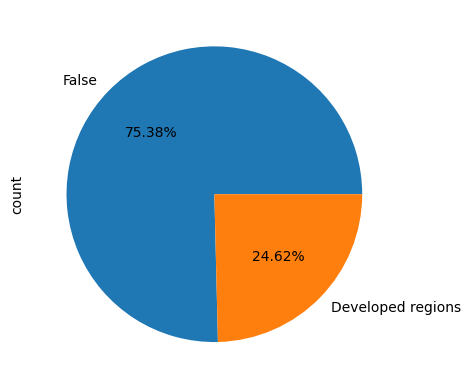

In [25]:
df["developed"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [35]:
sns.countplot(data=df,x='Developed')

AttributeError: module 'plotly.express' has no attribute 'countplot'

In [31]:
df["developed"].value_counts().plot(kind="bar",backend="plotly")

In [38]:
df.sort_values(by='total',ascending=False).head(10)[['developed','total']]

,developed,total
79,False,691904
36,False,659962
183,Developed regions,551500
136,False,511391
130,False,241600
185,Developed regions,241122
81,False,175923
162,False,148358
140,False,142581
137,Developed regions,139241


creating a subset

In [39]:
top10= df.sort_values(
    by="total",
    ascending=False
    ).head(10)[["developed","total"]].copy()

- task 1: change the united kingdom to uk in the country column
- task 2: change iran(islmic republic of) to iran in the country
- task 3: create a bar chart for this

In [40]:
top10

,developed,total
79,False,691904
36,False,659962
183,Developed regions,551500
136,False,511391
130,False,241600
185,Developed regions,241122
81,False,175923
162,False,148358
140,False,142581
137,Developed regions,139241


In [42]:
top10.developed.tolist()

[False,
 False,
 'Developed regions',
 False,
 False,
 'Developed regions',
 False,
 False,
 False,
 'Developed regions']

In [43]:
top10 = top10.replace("United Kingdom of great Britain and Northern Ireland","UK")
top10 = top10.replace("Iran(Islamic Replublic of)","Iran")
top10 = top10.replace("United States of America","USA")
top10

,developed,total
79,False,691904
36,False,659962
183,Developed regions,551500
136,False,511391
130,False,241600
185,Developed regions,241122
81,False,175923
162,False,148358
140,False,142581
137,Developed regions,139241


In [46]:
sns.px(data=top10,hue="developed",y="developed",x="total",
            palette="rainbow", legend=False,orient="h")

AttributeError: module 'plotly.express' has no attribute 'px'

<Axes: xlabel='developed'>

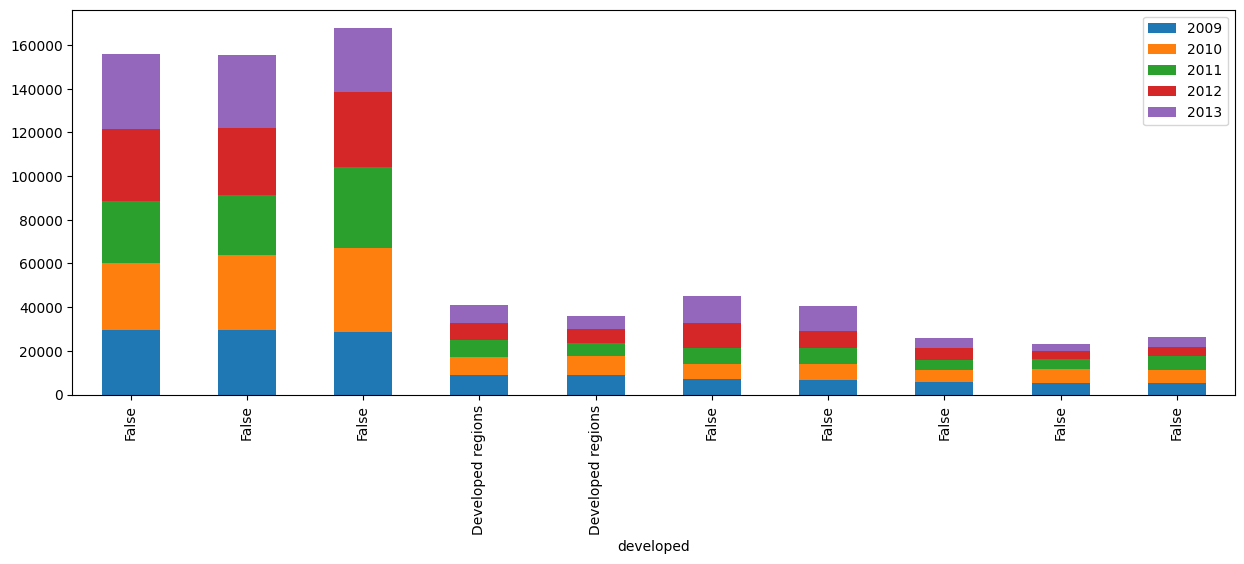

In [48]:
last_5_years =df[["developed",2009,2010,2011,2012,2013]].copy()
last_5_years =last_5_years.set_index("developed")
last_5_years.sort_values(by=2009,
    ascending=False).head(10).plot.bar(
        figsize=(15,5),stacked=True
    )

In [49]:
developed = df[["developed"]+list(years)].copy().set_index("developed")
developed

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
developed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
False,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
False,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
False,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
False,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217


In [51]:
cmean = developed.loc['Japan'].mean()
ax = developed.loc['Japan'].plot(marker='o',figsize=(15,5))
ax.hlines(y=cmean,xmin = 0, xmax=33, color='r')
ax.text(0,cmean+25,f'Avg Immigration = {cmean:0f}/year',color='k')

KeyError: 'Japan'

In [50]:
country.loc[["Japan","France"]].T.plot(fgsize=(15,5), kind="bar")

NameError: name 'country' is not defined

In [ ]:
country.loc[["Japan","France"]].T.plot(
    kind="bar", backend="plotly"
)

grouping data

In [52]:
df.groupby("developed")["total"].sum()

developed
False                4695142
Developed regions    1714011
Name: total, dtype: int64

In [53]:
df.groupby("continent")["total"].sum()

continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: total, dtype: int64

In [54]:
df.groupby("continent")[list(years)].sum()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [2]:
names = ["Asia","Europe"]
continents.loc[names].T.plot(backend="plotly")

NameError: name 'continents' is not defined